**Requirment**

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013.

Assume that the risk-free rate is 0.13% per month. Regress the monthly excess returns for each of the ten `industry portfolios` on the monthly excess returns for the `market portfolio`, so as to estimate the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios. Create a table showing the intercept and slope coefficients for the ten industry portfolios. Briefly explain the economic significance of the intercept and slope coefficients.

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding betas (by construction, the market portfolio has beta of one). This will give you the slope and intercept coefficients for the SML. (Warning: the results may be very different from what you would expect!)

Using the estimated slope and intercept coefficients, plot the SML in the range of beta from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.) Briefly explain the economic significance of the SML.

Please submit your results and programming code, as (uncompressed) MS Word or Adobe PDF, to the submission folder for Homework 2 before 7 pm on Wednesday, 28 October.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
Rf = 0.13

In [4]:
df_1 = pd.read_excel("Industry_Portfolios.xlsx").set_index("Date")
df_2 = pd.read_excel("Market_Portfolio.xlsx").set_index("Date")
df = pd.merge(df_1,df_2,left_index=True, right_index=True)-Rf

In [5]:
df.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,
200401,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75,2.09
200402,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03,1.33
200403,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76,-1.36
200404,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89,-1.88
200405,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73,1.10


**Method 1. Using OLS Method**

In [6]:
import statsmodels.api as sm

In [15]:
results_list = []
x = df['Market'] # Market Premium (Rm - Rf)
x = sm.add_constant(x)
for i in np.arange(10):
    y = df.iloc[:,i] # Excess Return (Ri - Rf)
    results = sm.OLS(y,x).fit()
    results_list.append(results.params)

In [32]:
abc = pd.DataFrame(results_list).set_index(df.columns[:-1])
abc.rename(columns = {"Market":"Slope(β)", "const":"Interecept(α)"}, inplace = True)

In [33]:
abc

,Interecept(α),Slope(β)
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


**Method 2. Using scipy Method**

In [7]:
#Run the regression parameter of 10 portfolio against market portfolio
slope = []
intercept = []
for i in np.arange(11):
    r = stats.linregress(df["Market"],df.iloc[:,i])
    slope.append(r.slope)
    intercept.append(r.intercept)

In [8]:
#Intercept and slope coefficients for the ten industry portfolios
slope_and_intercept = pd.DataFrame([slope, intercept], index =["Slope (β)","Intercept (α)"]).T.set_index(df.columns[:])
slope_and_intercept

,Slope (β),Intercept (α)
NoDur,0.652647,0.369443
Durbl,1.648536,-0.415599
Manuf,1.169846,0.159771
Enrgy,0.969850,0.501719
HiTec,1.132969,-0.064020
Telcm,0.900729,0.194691
Shops,0.826492,0.275492
Hlth,0.673036,0.237841
Utils,0.538086,0.444585
Other,1.207309,-0.387135


In [9]:
#Calculate the Mean Monthly Return of 10 portfolio and Market portfolio
mean_return = pd.DataFrame(df.mean()+Rf,columns = ['Average Monthly Return'])
mean_return

,Average Monthly Return
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [10]:
# perform regression to evaluate parameter SML
SML = stats.linregress(slope_and_intercept.iloc[:,0],mean_return.iloc[:,0])
SML_intercept = SML.intercept
SML_slope = SML.slope
print(SML_intercept, SML_slope)

1.0327683682657058 -0.18546745836573256


In [11]:
x_list = list(np.arange(3))
y_list = []
for x in x_list:
    # y = 
    y = SML_intercept + x * SML_slope
    y_list.append(y)

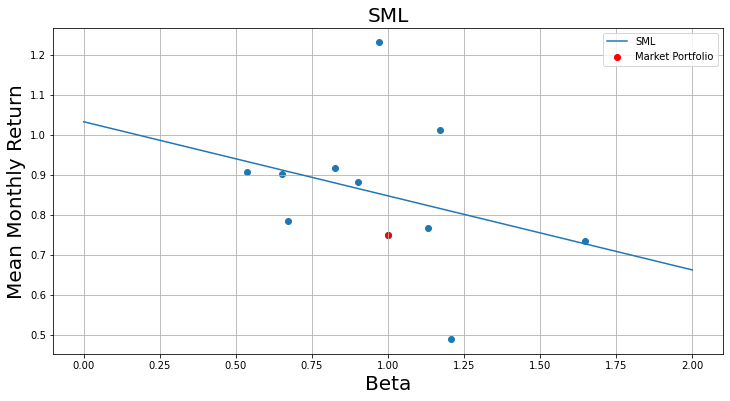

In [12]:
plt.figure(figsize = (12,6))

plt.scatter(slope_and_intercept.iloc[:,0], mean_return.iloc[:,0])
plt.scatter(1,mean_return.iloc[-1,0], color = "red", label=("Market Portfolio"))
plt.plot(x_list , y_list, label =("SML"))

plt.title("SML", fontsize = 20)
plt.ylabel("Mean Monthly Return", fontsize = 20)
plt.xlabel("Beta", fontsize = 20)

plt.legend()
plt.grid()
plt.show()

In [13]:
x_list = list(np.arange(3))
y_list = []
for x in x_list:
    # y = 
    y = 0.13 + x * (mean_return.iloc[-1,0]-0.13)
    y_list.append(y)

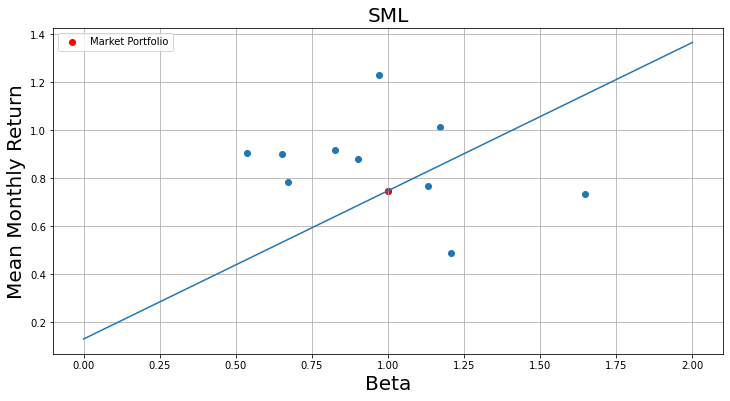

In [14]:
plt.figure(figsize = (12,6))

plt.scatter(slope_and_intercept.iloc[:,0], mean_return.iloc[:,0])
plt.plot(x_list, y_list)
plt.scatter(1,mean_return.iloc[-1,0], color = "red", label=("Market Portfolio"))

plt.title("SML", fontsize = 20)
plt.ylabel("Mean Monthly Return", fontsize = 20)
plt.xlabel("Beta", fontsize = 20)

plt.legend()
plt.grid()
plt.show()